In [4]:
import sys
import os
sys.path.append(os.path.abspath('../Models'))

In [5]:
import torch
from PIL import Image
import torchvision.transforms as transforms
from model_base import FashionCNN
import matplotlib.pyplot as plt

In [6]:
def test_and_visualize_image(image_path, model_path):
    # Label mapping
    labels = ['Bags', 'Bottomwear', 'Dress', 'Headwear', 'Shoes', 'Topwear', 'Watches']
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load model
    model = FashionCNN(7).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device)['model_state'])
    model.eval()
    
    # Prepare image preprocessing
    transform = transforms.Compose([
        transforms.Resize((177, 177)),
        transforms.ToTensor(),
    ])
    
    # Load and preprocess image
    image = Image.open(image_path)
    transformed_image = transform(image).unsqueeze(0).to(device)
    
    # Inference
    with torch.no_grad():
        outputs = model(transformed_image)
        probabilities = torch.softmax(outputs, dim=1)[0]
    
    # Plot
    plt.figure(figsize=(12, 4))
    
    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Input Image")
    plt.axis('off')
    
    # Plot probabilities
    plt.subplot(1, 2, 2)
    plt.barh(labels, probabilities.cpu().numpy())
    plt.title("Class Probabilities")
    plt.xlabel("Probability")
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("\nDetailed Results:")
    print("-" * 50)
    for label, prob in zip(labels, probabilities):
        percentage = prob.item() * 100
        print(f"{label:<15} : {percentage:.2f}%")
    
    predicted_class = labels[probabilities.argmax().item()]
    print(f"\nPredicted class: {predicted_class}")

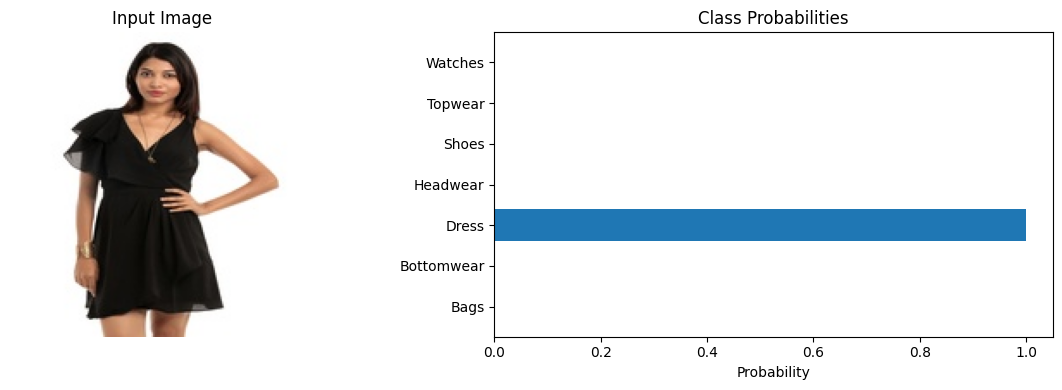


Detailed Results:
--------------------------------------------------
Bags            : 0.00%
Bottomwear      : 0.00%
Dress           : 100.00%
Headwear        : 0.00%
Shoes           : 0.00%
Topwear         : 0.00%
Watches         : 0.00%

Predicted class: Dress


In [13]:
image_path = "../Dataset/Dress/dress0223.jpg" #Cari direktori gambar yang mau di tes
model_path = "../Models/runs/FashionClassification-FashionCNN-41/best_checkpoint.pth"

test_and_visualize_image(image_path, model_path)